In [2]:
# Working from https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf

# Chapter 2

from torchvision import models

dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [3]:
alexnet = models.AlexNet() # Gets the architecture, not the weights

resnet = models.resnet101(pretrained=True)

resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256), # Smaller edge of the image is set to size 256
    transforms.CenterCrop(224), # This gives a square crop of size 224
    transforms.ToTensor(), # Expects a PIL image as input
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]

)])


In [8]:
from PIL import Image
img = Image.open("./catexample.jpeg")

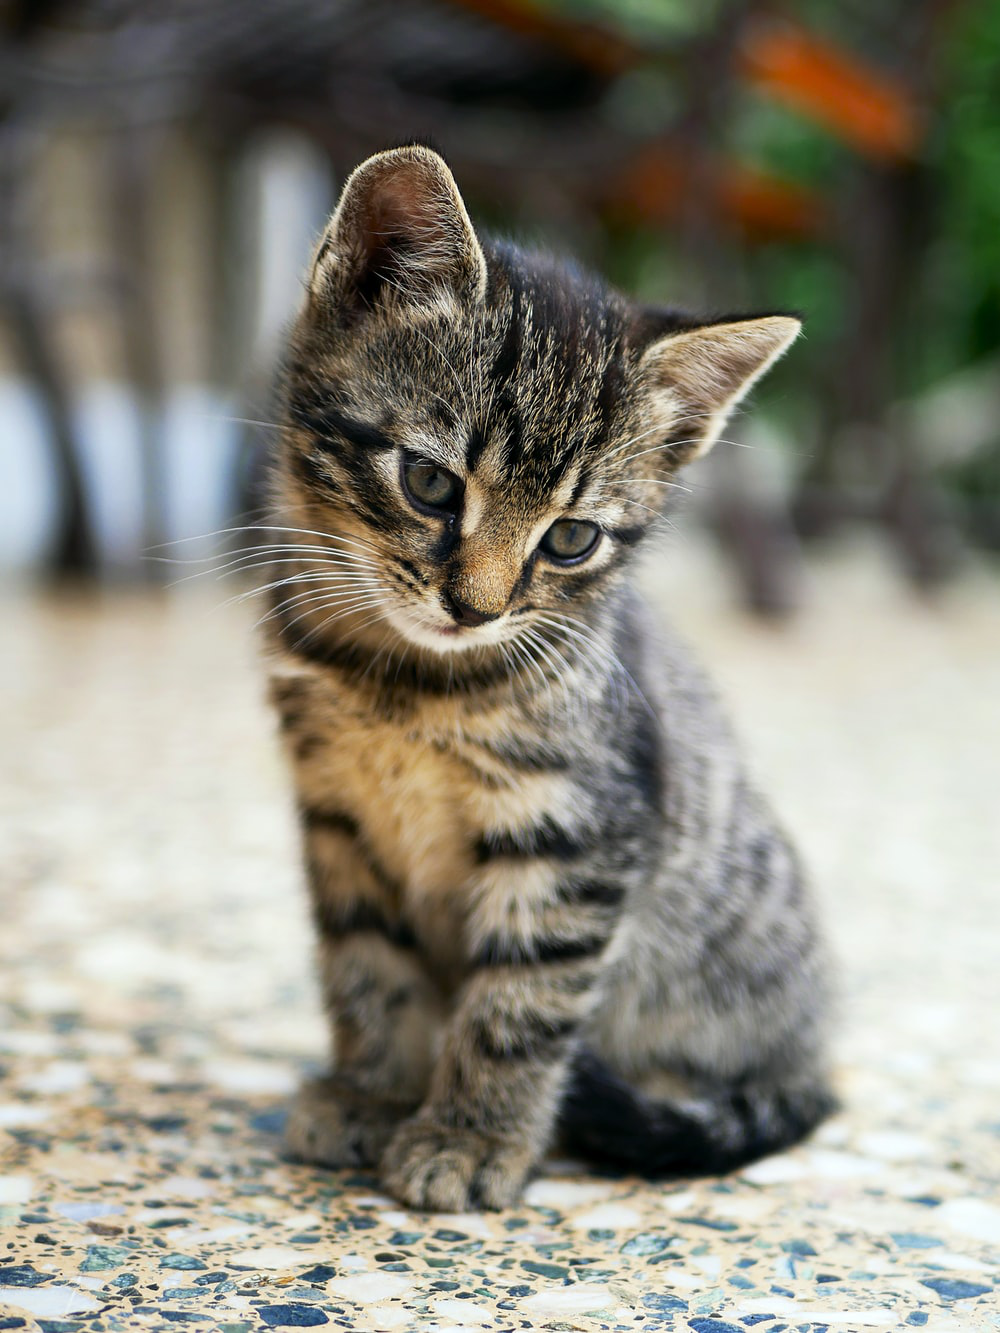

In [8]:
img

In [9]:
img_t = preprocess(img)
img_t

tensor([[[ 0.2624,  0.2453,  0.2282,  ..., -1.6898, -1.6555, -1.6384],
         [ 0.2624,  0.2453,  0.2453,  ..., -1.6898, -1.6555, -1.6384],
         [ 0.2796,  0.2796,  0.2796,  ..., -1.6898, -1.6384, -1.6042],
         ...,
         [ 1.3242,  1.3755,  1.4269,  ...,  1.8379,  1.8208,  1.8037],
         [ 1.2899,  1.3927,  1.4954,  ...,  1.7523,  1.7009,  1.6667],
         [ 1.3755,  1.4440,  1.5297,  ...,  1.6153,  1.5639,  1.5297]],

        [[ 0.2752,  0.2752,  0.2577,  ..., -1.4930, -1.4230, -1.3704],
         [ 0.2927,  0.2752,  0.2752,  ..., -1.4930, -1.4230, -1.3529],
         [ 0.2927,  0.3102,  0.3102,  ..., -1.4930, -1.4055, -1.3179],
         ...,
         [ 1.3957,  1.4657,  1.5007,  ...,  2.0784,  2.0434,  2.0259],
         [ 1.1856,  1.3081,  1.4307,  ...,  2.0084,  1.9559,  1.9384],
         [ 1.1856,  1.3081,  1.4307,  ...,  1.9384,  1.8859,  1.8683]],

        [[ 0.1825,  0.1128,  0.0779,  ..., -1.4559, -1.4559, -1.4384],
         [ 0.1651,  0.0779,  0.0605,  ..., -1

In [10]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

resnet.eval()

out = resnet(batch_t)

out

tensor([[-3.2643e+00, -1.6363e+00, -3.1851e+00, -3.1128e+00, -2.8279e+00,
         -3.4531e+00, -3.7741e+00, -1.4414e+00, -1.2724e+00, -6.3438e-01,
          3.7619e-01, -1.9949e+00, -4.4188e-01, -1.5878e+00, -1.3788e+00,
          1.7766e+00, -2.6643e+00, -1.3425e+00, -6.4406e-01, -3.0133e+00,
         -9.4133e-01, -2.0156e+00, -1.5402e+00, -1.6395e+00,  2.1004e+00,
         -1.4347e+00, -4.5143e-01, -7.6373e-01, -1.4481e+00, -2.6884e+00,
          2.5046e-01, -1.5391e+00, -1.4899e+00, -2.9003e+00, -1.4218e+00,
         -3.2066e-01,  1.1160e+00,  9.6441e-02, -1.2292e-03,  1.1011e+00,
         -1.4853e+00,  3.0600e+00, -4.6933e-01,  1.4215e-01,  2.0467e+00,
         -1.1999e+00,  1.0100e+00, -1.6826e+00,  8.3195e-02, -2.7136e-01,
         -4.2376e-01, -1.0141e+00,  8.9206e-01,  5.8254e-01, -6.9397e-01,
         -1.3296e+00, -1.1865e+00,  5.9482e-01, -1.0513e-01,  7.2545e-01,
          7.1125e-01, -1.9068e+00,  1.8305e-01, -4.8727e-01, -1.4763e+00,
         -1.4332e+00,  1.2985e+00,  1.

In [11]:
import re

def get_name(str):
    return re.search(r'[\'\"](.*)[\'\"]', str).group(1)

with open('./image_net_labels.txt') as f:
    labels = [get_name(line) for line in f.readlines()]

labels[10]

'brambling, Fringilla montifringilla'

In [31]:
from torch.nn import functional as F

percentage = F.softmax(out, dim=1)[0] * 100

n = 4
val, index = torch.topk(out, n)

for i in range(n):
    print(labels[index[0, i]], percentage[index[0, i]])


tabby, tabby cat tensor(64.7483, grad_fn=<SelectBackward0>)
tiger cat tensor(30.5825, grad_fn=<SelectBackward0>)
Egyptian cat tensor(3.9343, grad_fn=<SelectBackward0>)
lynx, catamount tensor(0.1426, grad_fn=<SelectBackward0>)


In [34]:
# Building a cycleGAN

import torch
import torch.nn as nn

class ResNetBlock(nn.Module): 

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
        nn.InstanceNorm2d(dim),
        nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
        nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x) :
        out = x + self.conv_block(x)
        return out
    

class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9):

        assert(n_blocks>=0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
        nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
        nn.InstanceNorm2d(ngf),
        nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
            stride=2, padding=1, bias=True),
            nn.InstanceNorm2d(ngf * mult * 2),
            nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]
        
        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
            kernel_size=3, stride=2, padding=1, output_padding=1, bias=True),
            nn.InstanceNorm2d(int(ngf * mult / 2)),
            nn.ReLU(True)]
        
        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input):
        return self.model(input)
    


In [ ]:
netG = ResNetGenerator()

mod